In [1]:
import pandas as pd
import matplotlib
matplotlib.use("Agg", warn=False)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
train = pd.read_csv("traindataset.csv")
test = pd.read_csv("testdataset.csv")

In [3]:
train.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,25,2015-07-05,1.47,140413.90,1503.10,56925.46,6707.85,75277.49,74370.82,906.67,0.00,conventional,2015,BuffaloRochester
1,45,2015-02-15,1.66,10159.47,7842.64,1205.10,0.00,1111.73,1096.68,15.05,0.00,organic,2015,PhoenixTucson
2,11,2016-10-09,0.99,885661.32,382978.65,208869.08,10640.59,283173.00,153973.16,128733.17,466.67,conventional,2016,PhoenixTucson
3,48,2015-01-25,1.06,290611.31,3806.65,233232.89,24.12,53547.65,53543.21,4.44,0.00,conventional,2015,NorthernNewEngland
4,22,2017-07-30,1.52,1306226.34,63098.74,856414.09,3849.65,382863.86,362404.90,17642.09,2816.87,conventional,2017,NewYork


In [4]:
test.head()

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,32,2015-05-17,13045.36,7163.20,5530.28,0.00,351.88,351.88,0.00,0.0,organic,2015,Sacramento
1,20,2016-08-07,22282.57,12876.46,2651.64,8.06,6746.41,6538.45,207.96,0.0,organic,2016,Denver
2,35,2015-04-26,435990.48,235664.26,141949.05,14634.32,43742.85,37689.45,6053.40,0.0,conventional,2015,SanDiego
3,11,2016-10-09,219089.52,43010.81,111487.02,218.09,64373.60,63388.04,985.56,0.0,conventional,2016,HarrisburgScranton
4,21,2016-07-31,7431.86,666.13,3284.48,14.18,3467.07,3467.07,0.00,0.0,organic,2016,Philadelphia


In [5]:
train.shape, test.shape

((16000, 14), (2249, 13))

In [6]:
#Lets check for any null=values in our data set
train.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
#Lets check for any null=values in our data set
test.isna().sum()

Unnamed: 0      0
Date            0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Data preprocessing

The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, lets remove it now !

In [8]:
train.drop('Unnamed: 0',axis=1,inplace=True) 
test.drop('Unnamed: 0',axis=1,inplace=True) 


In [9]:
train['Date']=pd.to_datetime(train['Date'])
train['Month']=train['Date'].apply(lambda x:x.month)
train['Day']=train['Date'].apply(lambda x:x.day)
test['Date']=pd.to_datetime(test['Date'])
test['Month']=test['Date'].apply(lambda x:x.month)
test['Day']=test['Date'].apply(lambda x:x.day)

# Treating of categorical variables

In [11]:
#Lets check how many unique values are available in type column
train['type'].unique()

array([0, 1], dtype=int64)

In [10]:
train['type'] = train['type'].map({
    'conventional': 0,
    'organic': 1
}.get)
test['type'] = test['type'].map({
    'conventional': 0,
    'organic': 1
}.get)


As i converted the date column to date format i already got month, year and day seperatly hence i will drop Date column

In [12]:
train.drop(['Date'],axis=1,inplace=True)
test.drop(['Date'],axis=1,inplace=True)


In [ ]:
#train = pd.concat([train,dummies.drop('WestTexNewMexico', axis='columns')], axis = 'columns')
#test = pd.concat([test,dummies.drop('WestTexNewMexico', axis='columns')], axis = 'columns')

In [13]:
train = train.rename(columns={'Total Volume': 'Total_volume', 'Small Bags': 'Small_bags', '4046' : 'Small_Hass', '4225': 'Large_Hass', '4770' : 'Extra_large_hass', 'Large Bags': 'Large_bags', 'XLarge Bags':'Xlarge_bags', 'Total Bags':'Total_bags'})
test = test.rename(columns={'Total Volume': 'Total_volume', 'Small Bags': 'Small_bags', '4046' : 'Small_Hass', '4225': 'Large_Hass', '4770' : 'Extra_large_hass', 'Large Bags': 'Large_bags', 'XLarge Bags':'Xlarge_bags', 'Total Bags':'Total_bags'})


# Now let us check for outliers in our data set

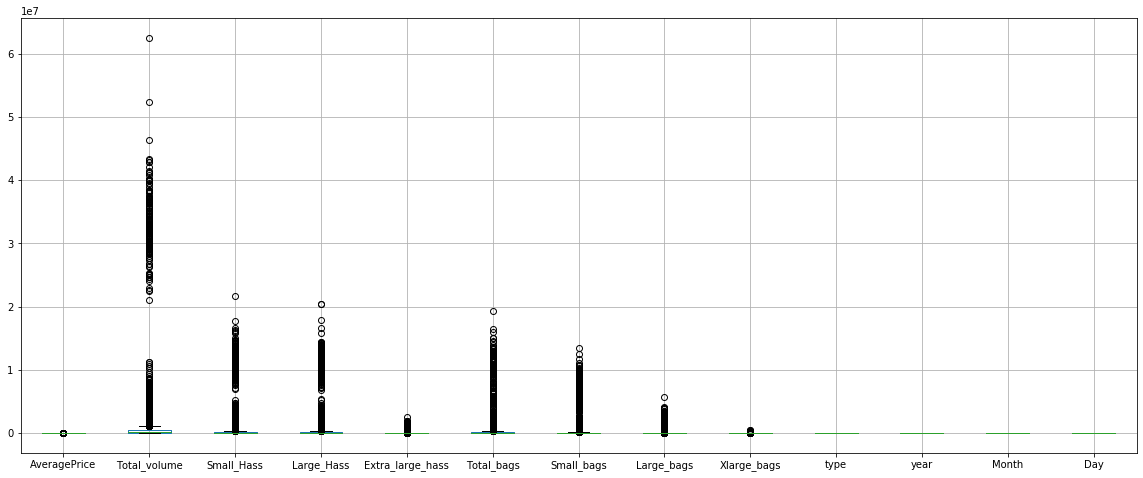

In [14]:
#start from averageprice column
train.boxplot(figsize=(20,8))


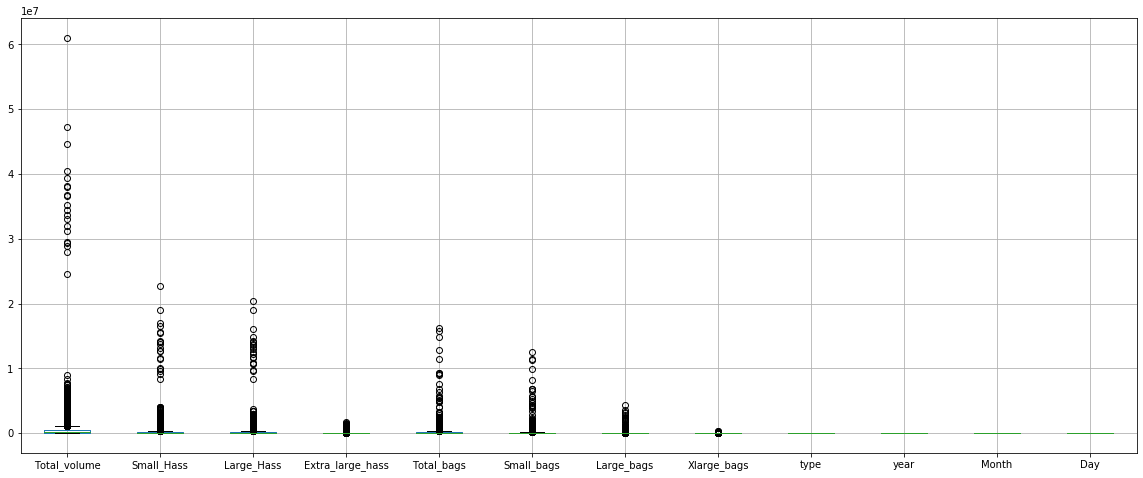

In [15]:
#start from averageprice column
test.boxplot(figsize=(20,8))

In [16]:
print(train['AveragePrice'].quantile(0.10))
print(train['AveragePrice'].quantile(0.90))

0.9300000000000002
1.93


In [17]:
train["AveragePrice"] = np.where(train["AveragePrice"] <0.93, 0.93,train['AveragePrice'])
train["AveragePrice"] = np.where(train["AveragePrice"] >1.9299999999999997, 1.9299999999999997,train['AveragePrice'])

In [18]:
print(train['Total_volume'].quantile(0.10))
print(train['Total_volume'].quantile(0.90))

3896.8940000000002
1378774.3769999999


In [19]:
print(test['Total_volume'].quantile(0.10))
print(test['Total_volume'].quantile(0.90))

3922.3420000000006
1462134.4920000008


In [20]:
train["Total_volume"] = np.where(train["Total_volume"] <3896.768, 3896.768,train['Total_volume'])
train["Total_volume"] = np.where(train["Total_volume"] >1387045.76, 1387045.76,train['Total_volume'])

In [21]:
test["Total_volume"] = np.where(test["Total_volume"] <3922.342, 3922.342,test['Total_volume'])
test["Total_volume"] = np.where(test["Total_volume"] >1462134.492, 1462134.492,test['Total_volume'])

In [22]:
print(train['Small_Hass'].quantile(0.10))
print(train['Small_Hass'].quantile(0.90))

93.694
538382.897


In [23]:
print(test['Small_Hass'].quantile(0.10))
print(test['Small_Hass'].quantile(0.90))

100.05600000000001
539131.8960000002


In [24]:
train["Small_Hass"] = np.where(train["Small_Hass"] <94.276, 94.276,train['Small_Hass'])
train["Small_Hass"] = np.where(train["Small_Hass"] >538385.184, 538385.184,train['Small_Hass'])

In [25]:
test["Small_Hass"] = np.where(test["Small_Hass"] <100.056, 100.056,test['Small_Hass'])
test["Small_Hass"] = np.where(test["Small_Hass"] >539131.896, 539131.896,test['Small_Hass'])

In [26]:
print(train['Large_Hass'].quantile(0.10))
print(train['Large_Hass'].quantile(0.90))

369.57
498164.70900000015


In [27]:
print(test['Large_Hass'].quantile(0.10))
print(test['Large_Hass'].quantile(0.90))

348.43399999999997
525449.1680000002


In [28]:
train["Large_Hass"] = np.where(train["Large_Hass"] <367.484, 367.484,train['Large_Hass'])
train["Large_Hass"] = np.where(train["Large_Hass"] >500784.552, 500784.552,train['Large_Hass'])

In [29]:
test["Large_Hass"] = np.where(test["Large_Hass"] <348.4339, 348.4339,test['Large_Hass'])
test["Large_Hass"] = np.where(test["Large_Hass"] >525449.168, 525449.168,test['Large_Hass'])

In [30]:
print(train['Extra_large_hass'].quantile(0.10))
print(train['Extra_large_hass'].quantile(0.90))

0.0
30859.661000000055


In [31]:
print(test['Extra_large_hass'].quantile(0.10))
print(test['Extra_large_hass'].quantile(0.90))

0.0
36321.0


In [32]:
train["Extra_large_hass"] = np.where(train["Extra_large_hass"] <0.0, 0.0,train['Extra_large_hass'])
train["Extra_large_hass"] = np.where(train["Extra_large_hass"] >30859.661, 30859.661,train['Extra_large_hass'])

In [33]:
test["Extra_large_hass"] = np.where(test["Extra_large_hass"] <0.0, 0.0,test['Extra_large_hass'])
test["Extra_large_hass"] = np.where(test["Extra_large_hass"] >36321.0, 3632.0,test['Extra_large_hass'])

In [34]:
print(train['Total_bags'].quantile(0.10))
print(train['Total_bags'].quantile(0.90))

1278.268
441733.2930000001


In [35]:
print(test['Total_bags'].quantile(0.10))
print(test['Total_bags'].quantile(0.90))

1523.516
444534.98800000007


In [36]:
train["Total_bags"] = np.where(train["Total_bags"] <1278.268, 1278.268,train['Total_bags'])
train["Total_bags"] = np.where(train["Total_bags"] >441733.293, 441733.293,train['Total_bags'])

In [37]:
test["Total_bags"] = np.where(test["Total_bags"] <1523.516, 1523.516,test['Total_bags'])
test["Total_bags"] = np.where(test["Total_bags"] >444534.988, 444534.988,test['Total_bags'])

In [38]:
print(train['Small_bags'].quantile(0.10))
print(train['Small_bags'].quantile(0.90))

579.8990000000001
352498.20100000006


In [39]:
print(test['Small_bags'].quantile(0.10))
print(test['Small_bags'].quantile(0.90))

610.864
356638.8240000001


In [40]:
train["Small_bags"] = np.where(train["Small_bags"] <579.899, 579.899,train['Small_bags'])
train["Small_bags"] = np.where(train["Small_bags"] >352498.201, 352498.201,train['Small_bags'])

In [41]:
test["Small_bags"] = np.where(test["Small_bags"] <610.864, 610.864,test['Small_bags'])
test["Small_bags"] = np.where(test["Small_bags"] >356638.824, 356638.824,test['Small_bags'])

In [42]:
print(train['Large_bags'].quantile(0.10))
print(train['Large_bags'].quantile(0.90))

0.0
93665.44300000007


In [43]:
print(test['Large_bags'].quantile(0.10))
print(test['Large_bags'].quantile(0.90))

0.0
97253.96400000004


In [44]:
train["Large_bags"] = np.where(train["Large_bags"] <0.0, 0.0,train['Large_bags'])
train["Large_bags"] = np.where(train["Large_bags"] >93665.443, 93665.443,train['Large_bags'])

In [45]:
test["Large_bags"] = np.where(test["Large_bags"] <0.0, 0.0,test['Large_bags'])
test["Large_bags"] = np.where(test["Large_bags"] >97253.964, 97253.964,test['Large_bags'])

In [46]:
print(train['Xlarge_bags'].quantile(0.10))
print(train['Xlarge_bags'].quantile(0.90))

0.0
3653.7540000000026


In [47]:
print(test['Xlarge_bags'].quantile(0.10))
print(test['Xlarge_bags'].quantile(0.90))

0.0
4072.3360000000016


In [48]:
train["Xlarge_bags"] = np.where(train["Xlarge_bags"] <0.0, 0.0,train['Xlarge_bags'])
train["Xlarge_bags"] = np.where(train["Xlarge_bags"] >3653.754, 3653.754,train['Xlarge_bags'])

In [49]:
test["Xlarge_bags"] = np.where(test["Xlarge_bags"] <0.0, 0.0,test['Xlarge_bags'])
test["Xlarge_bags"] = np.where(test["Xlarge_bags"] >4072.336, 4072.336,test['Xlarge_bags'])

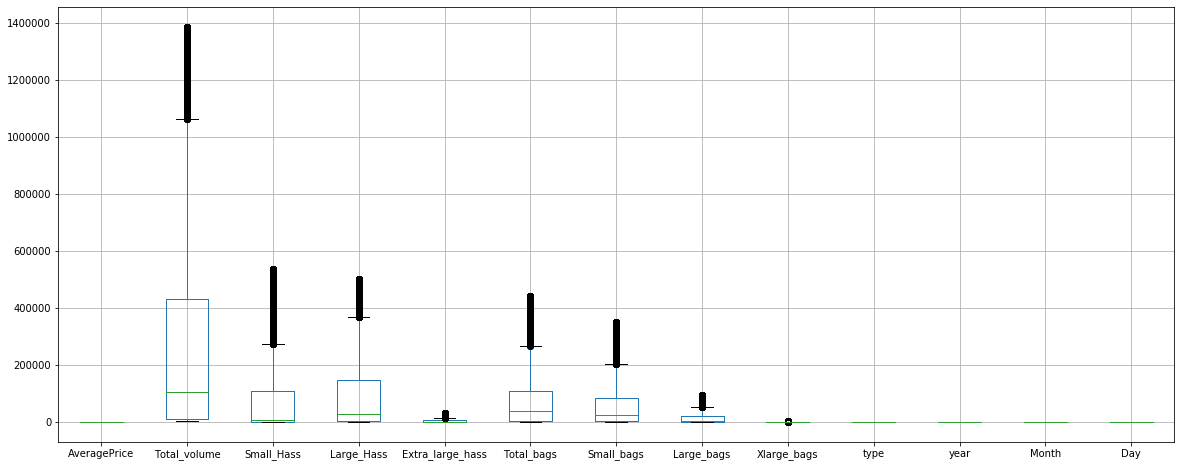

In [50]:
train.boxplot(figsize=(20,8))

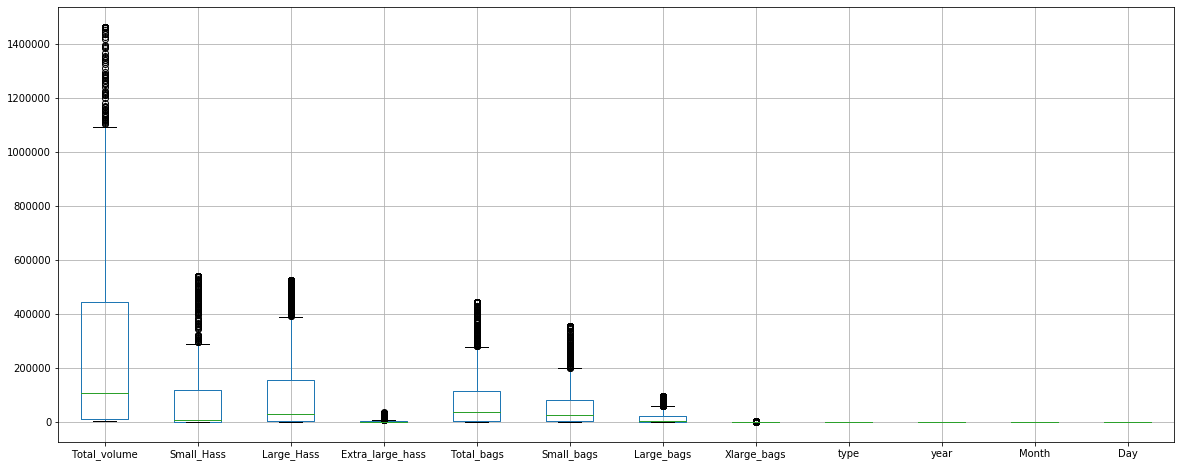

In [51]:
test.boxplot(figsize=(20,8))

In [53]:
dummies=pd.get_dummies(train.region)
dummies1=pd.get_dummies(test.region)


In [54]:
train = pd.concat([train,dummies.drop('WestTexNewMexico', axis='columns')], axis = 'columns')
test = pd.concat([test,dummies1.drop('WestTexNewMexico', axis='columns')], axis = 'columns')

In [55]:
test.shape

(2249, 66)

In [56]:
train.drop('region',axis=1,inplace=True) 
test.drop('region',axis=1,inplace=True) 

In [57]:
train.to_csv("Train.csv1", index = False)
test.to_csv("Test.csv2", index = False)